In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
dataset= pd.read_csv("Loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
#lets use CoapplicantIncome as it has no null val

/var/folders/by/qsk1qj_17w78tkfjr_tj_2rh0000gn/T/ipykernel_14053/1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


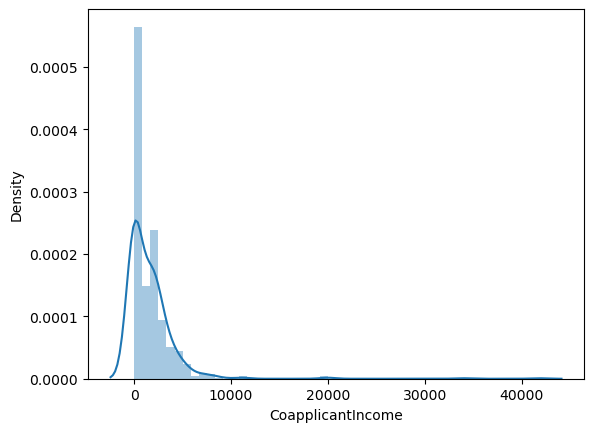

In [34]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

We see it's not normally distributed and has a long tail i.e. outliers

In [35]:
# we can remove outlier before moving forward. Using IQR
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
IQR = q3-q1

In [36]:
min_range = q1-1.5*IQR
max_range = q3+1.5*IQR
min_range, max_range

(-3445.875, 5743.125)

In [37]:
dataset = dataset[dataset["CoapplicantIncome"]<= max_range]

/var/folders/by/qsk1qj_17w78tkfjr_tj_2rh0000gn/T/ipykernel_14053/1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


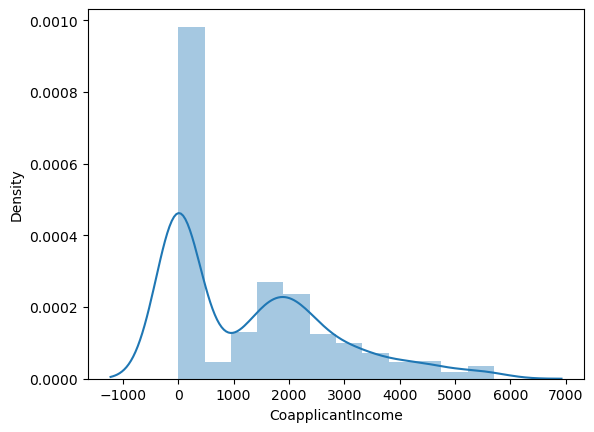

In [38]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

We successfully removed the outlier almost upto the max_range

### Using Function Transformation
To make the graph normally distributed 

In [39]:
from sklearn.preprocessing import FunctionTransformer

In [43]:
 ft = FunctionTransformer(func=np.log1p) #need to mention the function you want to create. We are using log function but can be anything.
#we use log1p and not base 10 or 0 as it wouldn't work for value of 0 but would work for 1p. log0 or loge0 or log10(0) all would give infinity.
# log1p() method returns log(1+number), computed in a way that is accurate even when the value of number is close to zero.

In [44]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [46]:
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]])

In [47]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_tf
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.484797
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.000000


/var/folders/by/qsk1qj_17w78tkfjr_tj_2rh0000gn/T/ipykernel_14053/3790658825.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/by/qsk1qj_17w78tkfjr_tj_2rh0000gn/T/ipykernel_14053/3790658825.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a

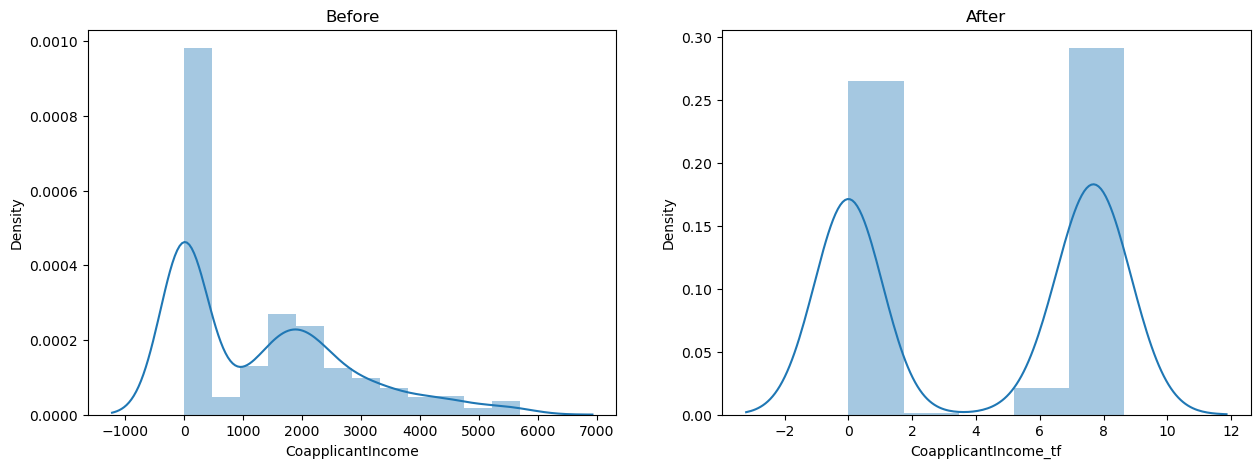

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After") 
sns.distplot(dataset["CoapplicantIncome_tf"])

plt.show()

In [54]:
ft1 = FunctionTransformer(func= lambda x: x**2 ) # using x^2 function. Use lambda for it.
ft1.fit(dataset["CoapplicantIncome"])
dataset["CoapplicantIncome_tf1"] = ft1.transform(dataset[["CoapplicantIncome"]])

/var/folders/by/qsk1qj_17w78tkfjr_tj_2rh0000gn/T/ipykernel_14053/3646432880.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/by/qsk1qj_17w78tkfjr_tj_2rh0000gn/T/ipykernel_14053/3646432880.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a

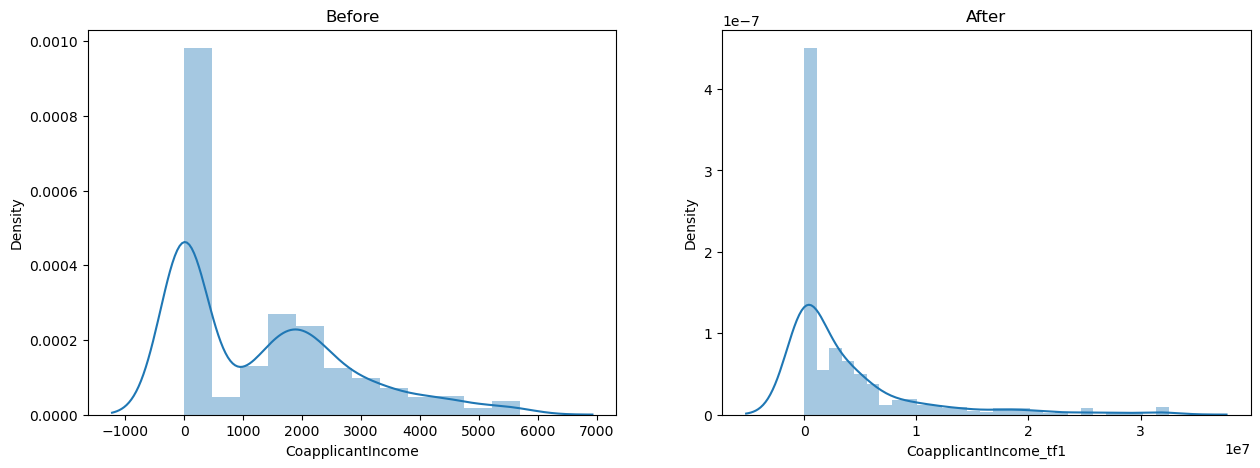

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After") 
sns.distplot(dataset["CoapplicantIncome_tf1"])

plt.show()